In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [182]:
train = pd.read_csv('BigMart_Train.csv')
test = pd.read_csv('BigMart_Test.csv')
display(train.head())
print("Train Shape: {}".format(train.shape))
display(test.head())
print("Test Shape: {}".format(test.shape))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Train Shape: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Test Shape: (5681, 11)


In [183]:
combined = pd.concat([train, test], ignore_index = True, sort = False)
display(combined.head())
print(combined.shape)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(14204, 12)


### Missing Values

In [184]:
print("Missing Values in Data:\n")
print(combined.isnull().sum())

Missing Values in Data:

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


#### Filling Item Weight Null Values

In [185]:
print(combined[combined.Item_Identifier == 'FDX07']['Item_Weight'])

3        19.2
1491     19.2
2459     19.2
3089     19.2
5906     19.2
7735      NaN
9054     19.2
12074    19.2
12561    19.2
Name: Item_Weight, dtype: float64


#####  We can see that the weight of items can be filled according to the item identifier

In [186]:
combined["Item_Weight"] = combined.groupby("Item_Identifier")['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [187]:
print(combined.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


#### Treating Item Visibility Abormal Values

In [188]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x : x.replace(to_replace = 0, value = x.median()))

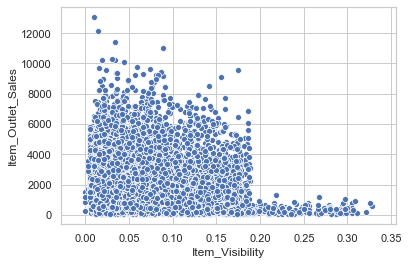

In [189]:
sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data = combined)
plt.show()

#### Filling Outlet Size Null Values

In [190]:
combined["Outlet_Size"] = combined.Outlet_Size.fillna("Medium")

In [191]:
print(combined.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64


### Extracting Item ID

In [192]:
print(combined.Item_Identifier[987][:2])

NC


In [193]:
listed = []
for i in combined.Item_Identifier:
    listed.append(i[:2])
combined["Item_Identifier"] = pd.Series(listed)

In [194]:
display(combined.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Price Per Unit

In [195]:
combined['Price_Per_Unit'] = combined["Item_MRP"] / combined['Item_Weight']

### Outlet Vintage

In [196]:
combined['Outlet_Vintage'] = 2020 - combined['Outlet_Establishment_Year']

### Binning Outlet ID according to crowd

In [197]:
print(combined["Outlet_Identifier"].value_counts())

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [198]:
def outlets(x):
    if(x in ['OUT027', 'OUT013', 'OUT035', 'OUT049', 'OUT046', 'OUT045', 'OUT018', 'OUT017']):
        return("High_Crowd")
    else:
        return("Low_Crowd")
combined["Outlet_Crowd"] = combined['Outlet_Identifier'].apply(outlets)

In [199]:
display(combined.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Vintage,Outlet_Crowd
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,21,High_Crowd
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,11,High_Crowd
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,21,High_Crowd
3,FD,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,22,Low_Crowd
4,NC,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,33,High_Crowd


### Item Type - Perishable & Non-perishable

In [200]:
print(combined.Item_Type.unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [201]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

In [202]:
def perishkaro(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [203]:
combined['Item_Type'] = combined.Item_Type.apply(perishkaro)

In [204]:
display(combined.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Vintage,Outlet_Crowd
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,21,High_Crowd
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,11,High_Crowd
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,21,High_Crowd
3,FD,19.20,Regular,0.022914,Perishables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,9.484115,22,Low_Crowd
4,NC,8.93,Low Fat,0.013177,Non Perishables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,33,High_Crowd


### Fixing Item Fat Content

In [205]:
combined.loc[combined['Item_Identifier'] == 'NC', "Item_Fat_Content"] = "Non Edible"

In [206]:
combined.Item_Fat_Content.replace(to_replace = ['LF', 'low fat'], value = ['Low Fat'] * 2, inplace = True)
combined.Item_Fat_Content.replace(to_replace = ['reg'], value = ['Regular'], inplace = True)

In [207]:
print(combined.Item_Fat_Content.value_counts())

Low Fat       6499
Regular       5019
Non Edible    2686
Name: Item_Fat_Content, dtype: int64


### Removing the columns that are not required anymore

In [208]:
combined.drop(['Outlet_Establishment_Year', 'Outlet_Identifier'], axis = 1, inplace = True)

In [209]:
display(combined.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price_Per_Unit,Outlet_Vintage,Outlet_Crowd
0,FD,9.30,Low Fat,0.016047,Perishables,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,21,High_Crowd
1,DR,5.92,Regular,0.019278,Non Perishables,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,11,High_Crowd
2,FD,17.50,Low Fat,0.016760,Perishables,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,21,High_Crowd
3,FD,19.20,Regular,0.022914,Perishables,182.0950,Medium,Tier 3,Grocery Store,732.3800,9.484115,22,Low_Crowd
4,NC,8.93,Non Edible,0.013177,Non Perishables,53.8614,High,Tier 3,Supermarket Type1,994.7052,6.031512,33,High_Crowd


### Checking Null Values once again

In [210]:
print(combined.isnull().sum())

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
Price_Per_Unit             0
Outlet_Vintage             0
Outlet_Crowd               0
dtype: int64


### Transforming the skewed Columns

In [211]:
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier         14204 non-null object
Item_Weight             14204 non-null float64
Item_Fat_Content        14204 non-null object
Item_Visibility         14204 non-null float64
Item_Type               14204 non-null object
Item_MRP                14204 non-null float64
Outlet_Size             14204 non-null object
Outlet_Location_Type    14204 non-null object
Outlet_Type             14204 non-null object
Item_Outlet_Sales       8523 non-null float64
Price_Per_Unit          14204 non-null float64
Outlet_Vintage          14204 non-null int64
Outlet_Crowd            14204 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 1.4+ MB
None


In [212]:
num_feat = combined.select_dtypes(['float64', 'int64']).columns
print(num_feat)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Price_Per_Unit', 'Outlet_Vintage'],
      dtype='object')


0.10041690891741965


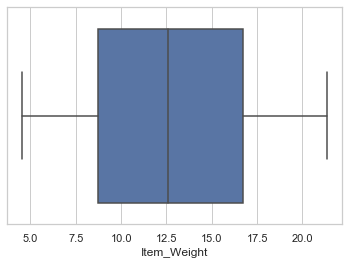

1.2444932025131705


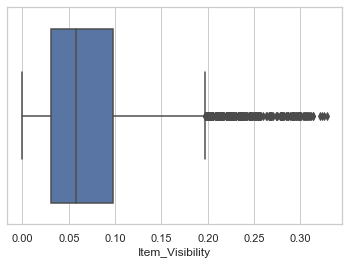

0.13072836040225863


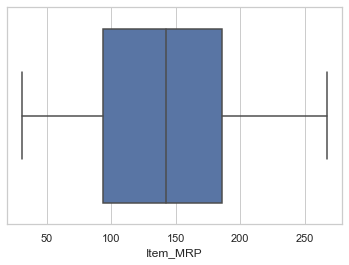

1.1775306028542798


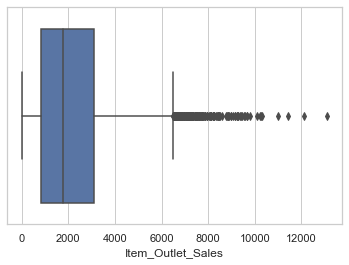

1.3048266667508304


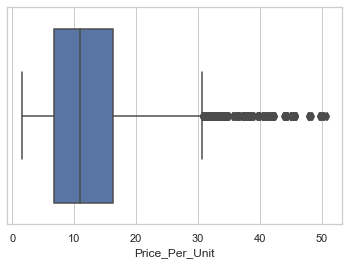

0.3964651900863859


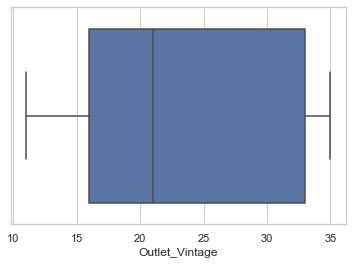

In [213]:
for i in num_feat:
    sns.boxplot(combined[i])
    print(combined[i].skew())
    plt.show()

In [214]:
for i in ['Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit']:
    combined[i] = (combined[i] ** (1 / 3))
    print(combined[i].skew())

0.11464322363050498
-0.10250699736722885
0.2564507665447104


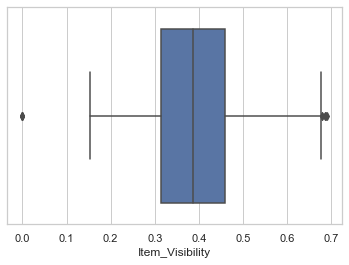

0.11464322363050498


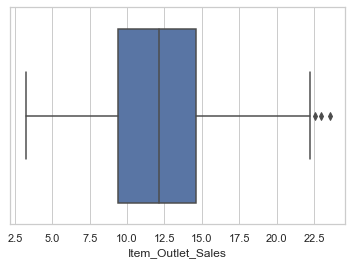

-0.10250699736722885


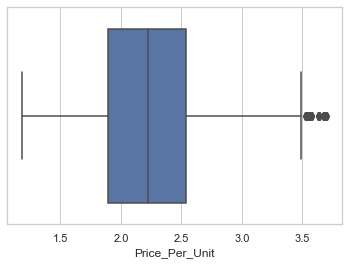

0.2564507665447104


In [215]:
for i in ['Item_Visibility', 'Item_Outlet_Sales', 'Price_Per_Unit']:
    sns.boxplot(combined[i])
    plt.show()
    print(combined[i].skew())

### Converting Catrgorical Variables into Numerical using dummies

In [216]:
df_dum = pd.get_dummies(combined, drop_first = True)

In [218]:
print(df_dum.shape)

(14204, 19)


In [219]:
display(df_dum.head())

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,9.30,0.252232,249.8092,15.515611,2.994851,21,1,0,0,0,1,1,0,0,0,1,0,0,0
1,5.92,0.268136,48.2692,7.625576,2.012717,11,0,0,0,1,0,1,0,0,1,0,1,0,0
2,17.50,0.255913,141.6180,12.800240,2.007675,21,1,0,0,0,1,1,0,0,0,1,0,0,0
3,19.20,0.284034,182.0950,9.013888,2.116731,22,1,0,0,1,1,1,0,0,1,0,0,0,1
4,8.93,0.236195,53.8614,9.982319,1.820296,33,0,1,1,0,0,0,0,0,1,1,0,0,0


### Splitting the Data back into train and test

#### Train Data

In [220]:
newtrain = df_dum[0:8523]

In [221]:
print(newtrain.shape)

(8523, 19)


In [222]:
display(newtrain.head())

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,9.30,0.252232,249.8092,15.515611,2.994851,21,1,0,0,0,1,1,0,0,0,1,0,0,0
1,5.92,0.268136,48.2692,7.625576,2.012717,11,0,0,0,1,0,1,0,0,1,0,1,0,0
2,17.50,0.255913,141.6180,12.800240,2.007675,21,1,0,0,0,1,1,0,0,0,1,0,0,0
3,19.20,0.284034,182.0950,9.013888,2.116731,22,1,0,0,1,1,1,0,0,1,0,0,0,1
4,8.93,0.236195,53.8614,9.982319,1.820296,33,0,1,1,0,0,0,0,0,1,1,0,0,0


#### Test Data

In [223]:
newtest = df_dum.loc[8523:]

In [224]:
print(newtest.shape)

(5681, 19)


In [225]:
newtest = newtest.drop("Item_Outlet_Sales", axis = 1)

In [226]:
newtest.reset_index(inplace = True, drop = True)

In [227]:
display(newtest.head())

,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,20.750,0.196306,107.8622,1.732276,21,1,0,0,0,0,1,0,0,0,1,0,0,0
1,8.300,0.337454,87.3198,2.191181,13,1,0,0,1,1,1,0,1,0,1,0,0,0
2,14.600,0.463500,241.7538,2.548826,22,0,1,1,0,0,1,0,0,1,0,0,0,1
3,7.315,0.248732,155.0340,2.767393,13,1,0,0,0,0,1,0,1,0,1,0,0,0
4,13.600,0.491316,234.2300,2.582466,35,1,0,0,1,1,1,0,0,1,0,0,1,0


In [228]:
print(newtest.shape)

(5681, 18)


### Splitting the Data into X (Independent) and Y (Dependent / Target) Variables

In [229]:
X_train = newtrain.drop("Item_Outlet_Sales", axis = 1)
y_train = newtrain['Item_Outlet_Sales']
X_test = newtest

In [230]:
display(X_train.head())
print(X_train.shape)
display(y_train.head())
print(y_train.shape)
display(X_test.head())
print(X_test.shape)

,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,9.30,0.252232,249.8092,2.994851,21,1,0,0,0,1,1,0,0,0,1,0,0,0
1,5.92,0.268136,48.2692,2.012717,11,0,0,0,1,0,1,0,0,1,0,1,0,0
2,17.50,0.255913,141.6180,2.007675,21,1,0,0,0,1,1,0,0,0,1,0,0,0
3,19.20,0.284034,182.0950,2.116731,22,1,0,0,1,1,1,0,0,1,0,0,0,1
4,8.93,0.236195,53.8614,1.820296,33,0,1,1,0,0,0,0,0,1,1,0,0,0


(8523, 18)


0    15.515611
1     7.625576
2    12.800240
3     9.013888
4     9.982319
Name: Item_Outlet_Sales, dtype: float64

(8523,)


,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,20.750,0.196306,107.8622,1.732276,21,1,0,0,0,0,1,0,0,0,1,0,0,0
1,8.300,0.337454,87.3198,2.191181,13,1,0,0,1,1,1,0,1,0,1,0,0,0
2,14.600,0.463500,241.7538,2.548826,22,0,1,1,0,0,1,0,0,1,0,0,0,1
3,7.315,0.248732,155.0340,2.767393,13,1,0,0,0,0,1,0,1,0,1,0,0,0
4,13.600,0.491316,234.2300,2.582466,35,1,0,0,1,1,1,0,0,1,0,0,1,0


(5681, 18)


In [235]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 18 columns):
Item_Weight                      5681 non-null float64
Item_Visibility                  5681 non-null float64
Item_MRP                         5681 non-null float64
Price_Per_Unit                   5681 non-null float64
Outlet_Vintage                   5681 non-null int64
Item_Identifier_FD               5681 non-null uint8
Item_Identifier_NC               5681 non-null uint8
Item_Fat_Content_Non Edible      5681 non-null uint8
Item_Fat_Content_Regular         5681 non-null uint8
Item_Type_Perishables            5681 non-null uint8
Outlet_Size_Medium               5681 non-null uint8
Outlet_Size_Small                5681 non-null uint8
Outlet_Location_Type_Tier 2      5681 non-null uint8
Outlet_Location_Type_Tier 3      5681 non-null uint8
Outlet_Type_Supermarket Type1    5681 non-null uint8
Outlet_Type_Supermarket Type2    5681 non-null uint8
Outlet_Type_Supermarket Type3    5681

### Applying Scaling to the data

In [239]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
display(X_train_scaled.head())
print(X_train.shape)
display(X_test_scaled.head())
print(X_test_scaled.shape)

,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,-0.409175,-0.921425,1.163142,1.200161,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.828270,-0.812330,-1.031872,-0.324319,-0.588235,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0
2,0.607564,-0.896179,-0.015191,-0.332145,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.818351,-0.703279,0.425652,-0.162868,0.058824,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0
4,-0.455053,-1.031434,-0.970966,-0.622997,0.705882,-1.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(8523, 18)


,Item_Weight,Item_Visibility,Item_MRP,Price_Per_Unit,Outlet_Vintage,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Perishables,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Crowd_Low_Crowd
0,1.010539,-1.305060,-0.382832,-0.759623,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.533168,-0.336835,-0.606564,-0.047305,-0.470588,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.247985,0.527794,1.075409,0.507836,0.058824,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0
3,-0.655301,-0.945438,0.130925,0.847099,-0.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.123993,0.718598,0.993465,0.560052,0.823529,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0


(5681, 18)


In [240]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 18 columns):
Item_Weight                      5681 non-null float64
Item_Visibility                  5681 non-null float64
Item_MRP                         5681 non-null float64
Price_Per_Unit                   5681 non-null float64
Outlet_Vintage                   5681 non-null float64
Item_Identifier_FD               5681 non-null float64
Item_Identifier_NC               5681 non-null float64
Item_Fat_Content_Non Edible      5681 non-null float64
Item_Fat_Content_Regular         5681 non-null float64
Item_Type_Perishables            5681 non-null float64
Outlet_Size_Medium               5681 non-null float64
Outlet_Size_Small                5681 non-null float64
Outlet_Location_Type_Tier 2      5681 non-null float64
Outlet_Location_Type_Tier 3      5681 non-null float64
Outlet_Type_Supermarket Type1    5681 non-null float64
Outlet_Type_Supermarket Type2    5681 non-null float64
Outlet_Type_S

In [242]:
X_train_scaled.to_csv('X_train_scaled.csv')
X_test_scaled.to_csv('X_test_scaled.csv')
y_train.to_csv('y_train_transformed.csv')

C:\Users\Saurabh Tayal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
